In [1]:

# Jupyterでmatplotlibを使用する宣言と、使用するライブラリの定義
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

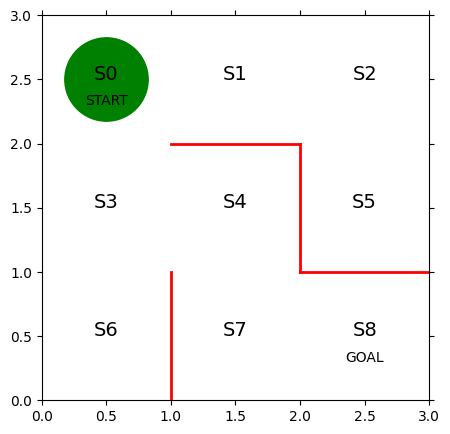

In [2]:

# 初期位置での迷路の様子
 
# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
 
# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)
 
# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')
 
# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')
 
# 現在値S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:

# 初期の方策を決定するパラメータtheta_0を設定
 
# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [4]:

# 方策パラメータtheta_0をランダム方策piに変換する関数の定義
 
def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''
 
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算
 
    pi = np.nan_to_num(pi)  # nanを0に変換
 
    return pi
 
# ランダム行動方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [5]:
# ε-greedy法を実装
 
def get_action_and_s_next(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
 
    # 行動を決める
    if np.random.rand() < epsilon:
        # εの確率でランダムに動く
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Qの最大値の行動を採用する
        next_direction = direction[np.nanargmax(Q[s, :])]
 
    # 決めた行動で次の状態を決める
    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる
 
    return [action, s_next]

Q学習の更新式
Q学習（Q-learning）はSarsaと同じく価値反復法による強化学習のアルゴリズムです。Sarsaと異なる点は1つだけで、行動価値関数の更新式が違います。

Sarsaの場合行動価値関数の更新式は、



で表されました。一方でQ学習の場合行動価値関数の更新式は



で表されます。

Sarsaの場合は更新時に暫定的に次の行動at+1を求め、更新に使用していました。一方Q学習は状態st+1での最も大きい行動価値関数の値を更新に使用します。

SarsaとQ学習の定性的な違い
Sarsaは行動価値関数Qの更新に次の行動at+1を使用するため、行動価値関数の更新がat+1を求める方策（ε-greedy法）のパラメータ ε に依存するという特徴があります。このような特性を方策オン型と呼びます。そのため、ε を計画的に減らすなどしないと行動価値関数がきちんと学習できません。

一方でQ学習は行動価値関数Qの更新にε-greedy法のパラメータεなど行動決定方法（方策）は依存しません。このような特性を方策オフ型と呼びます。ε-greedy法から生まれるランダム性が更新式に入らない分、行動価値関数の収束がSarsaよりも早いという特徴があります。

とはいえQ学習にε-greedy法が関係ないわけではなく、Sarsaと同じく方策の決定にはε-greedy法を使用します。そうしないと、例えば迷路であれば常に現在の行動価値関数が最大の方向へしか移動せず、未知の状態を探索してくれないからです。ですがSarsaのときのようにパラメータ ε を試行数（エピソード数）に従って小さく変化させなくても、Q学習は最適な方策価値関数に落ち着くことが示されています[1]。

結局SarsaとQ学習のどちらの方が良い手法なのかは実は行動価値関数の更新と、方策のε-greedy法のパラメータの組み合わせで決まるため、確定的にこちらがおすすめですとは証明されてはいないようです。

In [6]:

# Q学習による行動価値関数Qの更新
 
def Q_learning(s, a, r, s_next, Q, eta, gamma):
 
    if s_next == 8:  # ゴールした場合
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
 
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next,: ]) - Q[s, a])
        #Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
 
    return Q

In [7]:
# Q学習で迷路を解く関数の定義、状態と行動の履歴および更新したQを出力
 
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト
 
    while (1):  # ゴールするまでループ
        [a, s_next] = get_action_and_s_next(s, Q, epsilon, pi_0)
        s_a_history[-1][1] = a
        # 現在の状態（つまり一番最後なのでindex=-1）に行動を代入
 
        s_a_history.append([s_next, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく
 
        # 報酬を与え,　次の行動を求めます
        if s_next == 8:
            r = 1  # ゴールにたどり着いたなら報酬を与える
            a_next = np.nan
        else:
            r = 0
 
        # 価値関数を更新
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)
 
        # 終了判定
        if s_next == 8:  # ゴール地点なら終了
            break
        else:
            s = s_next
 
    return [s_a_history, Q]

In [8]:

# 初期の行動価値関数Qを設定
 
[a, b] = theta_0.shape  # 行と列の数をa, bに格納
Q = np.random.rand(a, b) * theta_0 * 0.1
# *theta0をすることで要素ごとに掛け算をし、Qの壁方向の値がnanになる

In [9]:

# Q学習で迷路を解く
 
eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1
 
V=[] # エピソードごとの状態価値を格納する
V.append(np.nanmax(Q, axis=1))  # 状態ごとに行動価値の最大値を求める
 
while is_continue:  # is_continueがFalseになるまで繰り返す
    print("エピソード:" + str(episode))
 
    # ε-greedyの値を少しずつ小さくする
    epsilon = epsilon / 2
 
    # Q学習で迷路を解き、移動した履歴と更新したQを求める
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
 
    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1)  # 状態ごとに行動価値の最大値を求める
    print(np.sum(np.abs(new_v - v)))  # 状態価値関数の変化を出力
    v = new_v
    V.append(v) # このエピソード終了時の状態価値関数を追加
 
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
 
    # 100エピソード繰り返す
    episode = episode + 1
    if episode > 100:
        break

エピソード:1
0.2816618476931899
迷路を解くのにかかったステップ数は566です
エピソード:2
0.16570230947993778
迷路を解くのにかかったステップ数は444です
エピソード:3
0.09709483814576789
迷路を解くのにかかったステップ数は20です
エピソード:4
0.09488109938483985
迷路を解くのにかかったステップ数は10です
エピソード:5
0.09289120440880444
迷路を解くのにかかったステップ数は4です
エピソード:6
0.09195889572382068
迷路を解くのにかかったステップ数は4です
エピソード:7
0.0910060966296039
迷路を解くのにかかったステップ数は4です
エピソード:8
0.09002013335189563
迷路を解くのにかかったステップ数は4です
エピソード:9
0.08898907116499379
迷路を解くのにかかったステップ数は4です
エピソード:10
0.08790235439129121
迷路を解くのにかかったステップ数は4です
エピソード:11
0.08675119880222301
迷路を解くのにかかったステップ数は4です
エピソード:12
0.08552879537127059
迷路を解くのにかかったステップ数は4です
エピソード:13
0.08423037297142318
迷路を解くのにかかったステップ数は4です
エピソード:14
0.08285315818390465
迷路を解くのにかかったステップ数は4です
エピソード:15
0.08139626258942628
迷路を解くのにかかったステップ数は4です
エピソード:16
0.07986052148973766
迷路を解くのにかかったステップ数は4です
エピソード:17
0.07824830273615892
迷路を解くのにかかったステップ数は4です
エピソード:18
0.0765633000363542
迷路を解くのにかかったステップ数は4です
エピソード:19
0.07481032161229559
迷路を解くのにかかったステップ数は4です
エピソード:20
0.07299508225680455
迷路を解くのにかかったステップ数は4です
エピソード:

In [10]:

# 状態価値の変化を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm  # color map
 
 
def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)
 
 
def animate(i):
    # フレームごとの描画内容
    # 各マスに状態価値の大きさに基づく色付きの四角を描画
    line, = ax.plot([0.5], [2.5], marker="s",
                    color=cm.jet(V[i][0]), markersize=85)  # S0
    line, = ax.plot([1.5], [2.5], marker="s",
                    color=cm.jet(V[i][1]), markersize=85)  # S1
    line, = ax.plot([2.5], [2.5], marker="s",
                    color=cm.jet(V[i][2]), markersize=85)  # S2
    line, = ax.plot([0.5], [1.5], marker="s",
                    color=cm.jet(V[i][3]), markersize=85)  # S3
    line, = ax.plot([1.5], [1.5], marker="s",
                    color=cm.jet(V[i][4]), markersize=85)  # S4
    line, = ax.plot([2.5], [1.5], marker="s",
                    color=cm.jet(V[i][5]), markersize=85)  # S5
    line, = ax.plot([0.5], [0.5], marker="s",
                    color=cm.jet(V[i][6]), markersize=85)  # S6
    line, = ax.plot([1.5], [0.5], marker="s",
                    color=cm.jet(V[i][7]), markersize=85)  # S7
    line, = ax.plot([2.5], [0.5], marker="s",
                    color=cm.jet(1.0), markersize=85)  # S8
    return (line,)
 
 
#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)
 
HTML(anim.to_html5_video())